# Pymaceuticals Analysis

* Capomulin is a promising drug - the only one to show a reduction in tumor size (19% over 45 days) among Capomulin, Infubinol, Ketapril and Placebo.

* Capomulin shows a steady and consistent decline in tumor size, slowest metastatic spread and the highest survival rate for mice during the trial period.

* Infubinol and Ketapril are generally no better than Placebo with similar trends on tumor growth and survival rate.

* Infubinol seems to be slightly better than Ketapril and Placebo in metastatic spread. However, it has the worst survival rate for mice at the end of the trial period.
---

### Dependencies and Setup
* Import matplotlib, pandas and numpy
* dfheader_remove_upper_space : Function to cleanup column names i.e lowercase with underscores

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# define useful functions
def dfheader_remove_upper_space(df):
    '''
    change column names of dataframe to lowercase with underscores
    '''
    # get list of column names
    oldcol = list(df.columns.values)
    # convert each column name to lowercase and replace space with underscore
    newcol = [s.lower().replace(' ', '_') for s in oldcol]
    # create a rename dict with the above
    rendict = dict(zip(oldcol, newcol))
    # return renamed dataframe
    return(df.rename(columns = rendict))
##end dfheader_remove_upper_space(df)

### Import Data
* Open Mouse Drug Data and Clinical Trial Data Files. Store into Pandas dataframe
* Combine the two into a single dataframe

In [2]:
# File to Load
mouse_drug_data_to_load = 'data/mouse_drug_data.csv'
clinical_trial_data_to_load = 'data/clinicaltrial_data.csv'

# Read the Mouse and Drug Data and the Clinical Trial Data
md = dfheader_remove_upper_space(pd.read_csv(mouse_drug_data_to_load))
dd = dfheader_remove_upper_space(pd.read_csv(clinical_trial_data_to_load))

# Combine the data into a single dataset
pyma = pd.merge(md, dd, how="left", on=['mouse_id', 'mouse_id'])
pyma = pyma.rename(columns={'tumor_volume_(mm3)': 'tumor_volume_mm3'})

# Create list of drugs interested in analyzing
columnlist = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
# Create list of formats for plotting each drug
formatlist = ['ro:', 'b^:', 'gs:', 'kD:']

# Display the data table for preview
pyma.head()

,mouse_id,drug,timepoint,tumor_volume_mm3,metastatic_sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Define Useful Function
* summary_tumor_resp : Generates a summary dataframe from the multigroup data.
* pyma_plot_errorbar : Generates an errorbar plot for requested list of columns from the given mean and standard error dataframes.
* pyma_column_errorbar : Generates an errorbar plot for the requested column from the given mean and standard error dataframes.

In [3]:
def summary_tumor_resp(data, idx):
    '''
    Returns a summary dataframe from the multigroup data.
    '''
    # Create summary dataframe
    sdf = pd.DataFrame({'tumor_volume_mm3': data})
    sdf.reindex()
    # Unstack multiindexed dataframe
    sdf = sdf.unstack(level=idx)
    sdf.columns = sdf.columns.droplevel()
    return sdf
##end summary_tumor_resp(data, idx)

def pyma_column_errorbar(dfmean, dferr, col, f, x):
    '''
    Create an errorbar for requested column from the mean and standard error dataframes.
    '''
    # If no standard error dataframe specified, convert to a line graph.
    if dferr is None:
        err = None
    else:
        err = dferr[col]

    x.errorbar(x=dfmean.index.values, y=dfmean[col], yerr=err, fmt=f)
##end pyma_errorbar(dfmean, dferr, col, f, x)

def pyma_plot_errorbar(dfmean, dferr, columns, formats, t, xl, yl, fname):
    '''
    Create an errorbar for requested list of columns from the mean and standard error dataframes.
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    for i, col in enumerate(columns):
        pyma_column_errorbar(dfmean, dferr, col, formats[i], ax)

    ax.grid()
    # Set the Title and X/Y labels
    ax.set_title(t, fontweight='bold')
    ax.set_xlabel(xl, fontsize=12)
    ax.set_ylabel(yl, fontsize=12)
    # Create a legend
    ax.legend(loc='best')
    # Save the Figure
    plt.savefig(f'plots/{fname}.png')
    # Show the Figure
    plt.show()
##end pyma_plot_errorbar(dfmean, dferr, columns, formats, t, xl, yl)

## Tumor Response to Treatment
* Create two new summary dataframes to capture: mean Tumor Volume and corresponding standard error for each drug.

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
dtgrp = pyma.groupby(['drug', 'timepoint'])
tumorvolmean = summary_tumor_resp(dtgrp.tumor_volume_mm3.mean(), 'drug')
# Preview DataFrame
tumorvolmean.head()

drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvolsem = summary_tumor_resp(dtgrp.tumor_volume_mm3.sem(), 'drug')
# Preview DataFrame
tumorvolsem.head()

drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


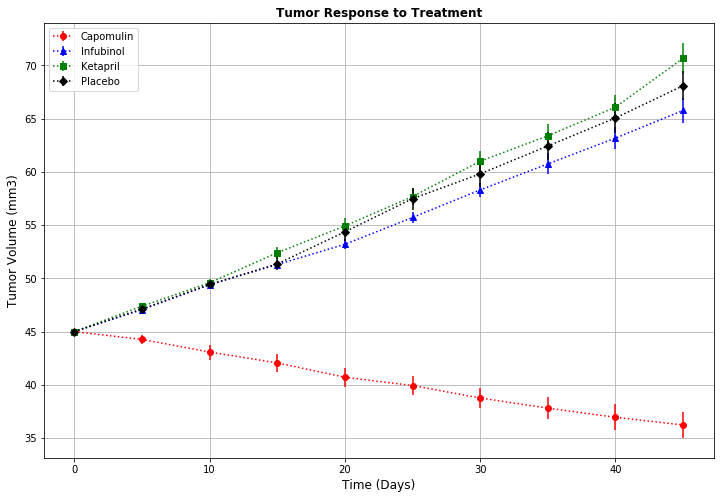

In [6]:
# Generate plot (with error bars) for tumor response to treatments 
pyma_plot_errorbar(tumorvolmean,
                   tumorvolsem,
                   columnlist,
                   formatlist,
                   'Tumor Response to Treatment',
                   'Time (Days)',
                   'Tumor Volume (mm3)',
                   'ErrorBar_TumorResponse')

## Metastatic Response to Treatment
* Create two new summary dataframes to capture: mean number of Metastatic Sites and corresponding standard error for each drug.

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metamean = summary_tumor_resp(dtgrp.metastatic_sites.mean(), 'drug')
# Preview DataFrame
metamean.head()

drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metasem = summary_tumor_resp(dtgrp.metastatic_sites.sem(), 'drug')
# Preview DataFrame
metasem.head()

drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


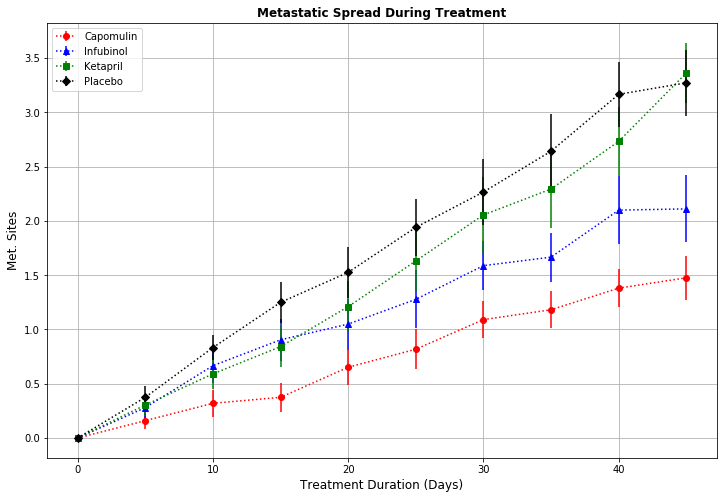

In [9]:
# Generate plot (with error bars) for metastatic spread during treatments
pyma_plot_errorbar(metamean,
                   metasem,
                   columnlist,
                   formatlist,
                   'Metastatic Spread During Treatment',
                   'Treatment Duration (Days)',
                   'Met. Sites',
                   'ErrorBar_MetastaticSpread')

## Survival Rates
* Create a new summary dataframe to capture: mice Survival Count for each drug.

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint
micecount = summary_tumor_resp(dtgrp.mouse_id.count(), 'drug')
# Preview DataFrame
micecount.head()

drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


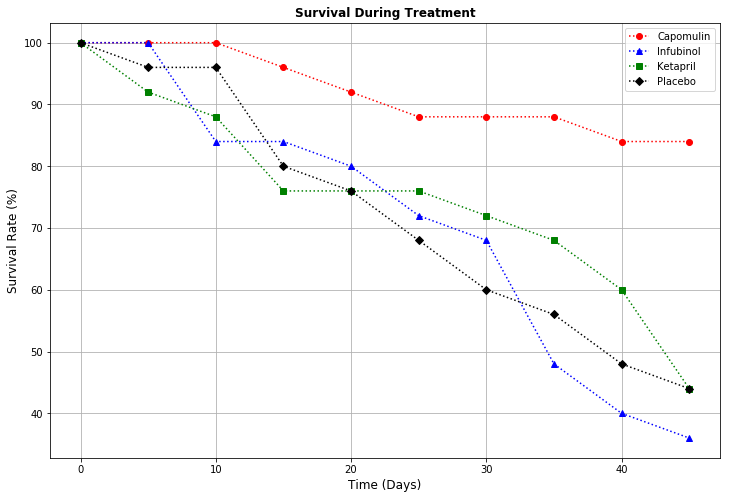

In [11]:
# Generate plot for the survival rate of mice during treatments (accounting for percentages)
msurvrate = micecount * 100.0 / micecount.loc[0]
pyma_plot_errorbar(msurvrate,
                   None,
                   columnlist,
                   formatlist,
                   'Survival During Treatment',
                   'Time (Days)',
                   'Survival Rate (%)',
                   'Line_SurvivalRate')

### Define Useful Function
* annotate_bars : Annotates the value of each bar in bar graph.

In [12]:
def annotate_bars(df, ax):
    '''
    Annotates the value of each bar in bar graph.
    '''
    for i, v in enumerate(df):
        # Set y-position to -5 or +5 depending on positive or negative value
        ypos = (1 - (2 * (v < 0))) * 5
        # Print value rounded to nearest integer in white
        ax.text(i-0.65, ypos, f'{int(v):3d}%', color='w', fontsize=15)
##end annotate_bars(df, ax)

## Summary Bar Graph

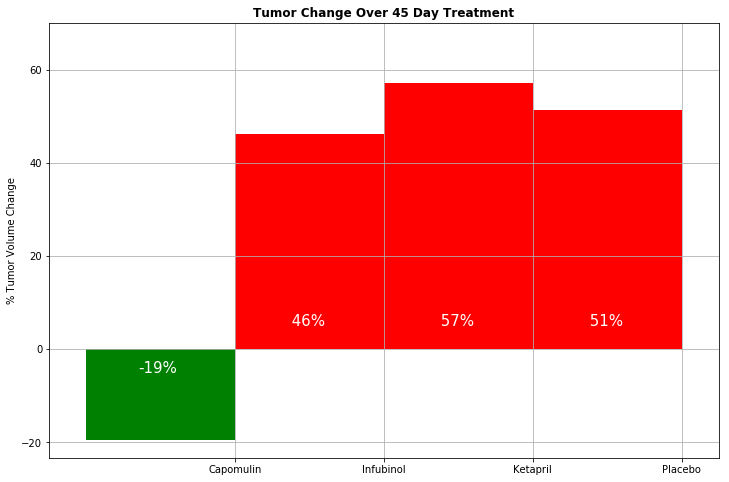

In [13]:
# Calculate the percent changes in tumor volume from start of trial to end - for each drug
tvolstart = tumorvolmean.iloc[0]
tvolend = tumorvolmean.iloc[-1]
tchg = (tvolend - tvolstart) * 100.0 / tvolstart

# Only keep values corresponding to drugs interested in analyzing
tchg = tchg.loc[columnlist]

# Separate the drugs with tumor size increase vs decrease
tinc = tchg.where(tchg>=0, 0)
tdec = tchg.where(tchg<0, 0)

# Generate the summary bar graph
fig, ax = plt.subplots(figsize=(12,8))
# Plot the tumor reduction in green
tdec.plot.bar(grid=True, color='g', align='edge', width=-1, ax=ax)
# Plot the tumor growth in red
tinc.plot.bar(grid=True, color='r', align='edge', width=-1, ax=ax)
# Set the title, labels, ticks, limits, etc.
ax.set_title('Tumor Change Over 45 Day Treatment', fontweight='bold')
ax.set_xlabel('')
ax.set_yticks([-20, 0 , 20, 40 , 60])
ax.set_ylabel('% Tumor Volume Change')
ax.set_xlim(-1.25, 3.25)
ax.set_ylim(top=70)
# Insert values into bars
annotate_bars(tchg, ax)
plt.xticks(rotation='horizontal')
# Save the Figure
plt.savefig(f'plots/Bar_TumorChange.png')
# Show the Figure
plt.show()